<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Primera-práctica:-Introducción-a-las-redes-neuronales-con-Keras" data-toc-modified-id="Primera-práctica:-Introducción-a-las-redes-neuronales-con-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Primera práctica: Introducción a las redes neuronales con Keras</a></span><ul class="toc-item"><li><span><a href="#1.-Información-sobre-el-dataset" data-toc-modified-id="1.-Información-sobre-el-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Información sobre el dataset</a></span></li><li><span><a href="#2.-Entrenamiento-de-una-red-neuronal-simple" data-toc-modified-id="2.-Entrenamiento-de-una-red-neuronal-simple-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Entrenamiento de una red neuronal simple</a></span></li><li><span><a href="#3.-Evaluación-del-modelo-en-datos-de-test" data-toc-modified-id="3.-Evaluación-del-modelo-en-datos-de-test-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Evaluación del modelo en datos de test</a></span></li></ul></li></ul></div>

# Primera práctica: Introducción a las redes neuronales con Keras

En esta primera práctica, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
import tensorflow as tf

import matplotlib.pyplot as plt

Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.5 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [ ]:
# Dimensión de los datos
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**Respuesta:** En el enlace que hace referencia al dataset Fashion MNIST indica que la magnitud de los datos de entrenamiento y de validación son de *60.000 y 10.000* imagenes respectivamente, cada imagen de tamaño 28x28, y lo corroboramos leyendo el atributo **shape** del arreglo numpy.

**Pregunta 1.2 *(0.5 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [ ]:
# Tamaño de las etiquetas
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


**Respuesta:** En el caso de los datasets **x_...** podemos observar una matriz de 3 dimensiones donde la primera dimensión tenemos la cantidad de imágenes, para las otras dos dimensiones tenemos la cantidad de pixeles de cada dimensión de la imagen, **alto y ancho**. Para el caso de los datasets **y_...** vemos la cantidad de etiquetas que corresponde a cada una de las imágenes de sus respectivos datasets **x_...**.

Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [ ]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

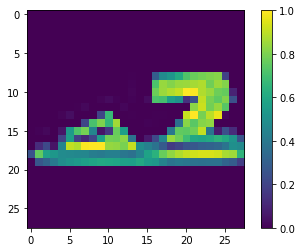

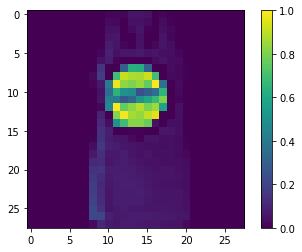

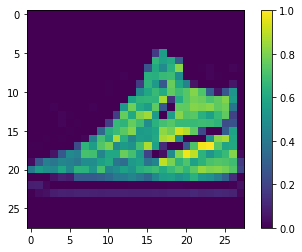

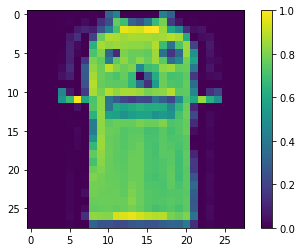

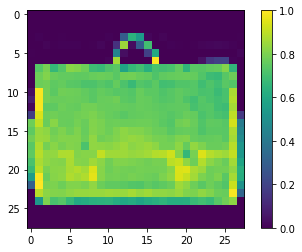

In [ ]:
# Obtener 5 imagenes al azar
import random
for i in range(0, 5):
    index = random.randint(0, 60000)
    visualize_example(x_train[index])

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(7.0 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [ ]:
# Verificar balanceo de clases
import numpy as np

labels, counts = np.unique(y_train, return_counts=True)
print("Clases para el entrenamiento: ", dict(zip(labels, counts)))

labels, counts = np.unique(y_test, return_counts=True)
print("Clases para la validación: ", dict(zip(labels, counts)))

Clases para el entrenamiento:  {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}
Clases para la validación:  {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


**Respuesta:** Se ha verificado que las clases están balanceadas.

In [ ]:
# Convertir a un vector one-hot
from keras.utils import to_categorical, plot_model

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Respuesta:** Es necesario convertir el valor de cada clase en un arreglo de 0s y 1s de 10 elementos (por ser 10 categorías de clasificación) donde la ubicación del valor 1 representa la posición de esa categoría en el resultado de la última capa de la red MLP.

In [ ]:
# Definiendo parámetros de la red neuronal
batch_size = 64
hidden_units_1 = 128
hidden_units_2 = 64
epochs = 20

In [ ]:
# Construyendo la red neuronal
# La primera capa es de tipo Flatten y sirve para aplanar la imagen de 2 dimensiones (28x28) a 1 dimensión de 784 posiciones
# El resto de capas se han creado a partir de las instrucciones de esta pregunta

model = Sequential()
model.add(Flatten(input_shape=(x_train.shape[1] , x_train.shape[1])))
model.add(Dense(hidden_units_1, activation='sigmoid'))
model.add(Dense(hidden_units_2, activation='sigmoid'))
model.add(Dense(len(labels), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


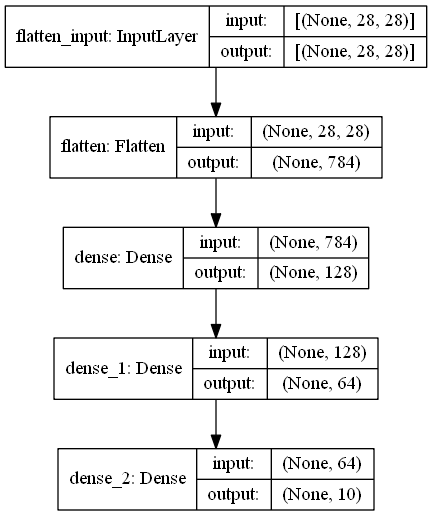

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
from keras.optimizers import SGD

model.compile(loss='binary_crossentropy',
              optimizer=SGD(learning_rate = 0.01, momentum=0.9),
              metrics=['accuracy'])

**Respuesta:** Se decide usar la función de perdida _binary_crossentropy_ ya que trabaja muy con modelos que tienen capas densas con la función de activación *sigmoid*.

Después de probar varios valores de la *tasa de aprendizaje y el momentum*, se obtuvo los valores que producían el **mayor valor de accuracy y menor valor de loss** entre las distintas pruebas de entrenamientos realizadas.

In [ ]:
history = model.fit(x_train, y_train, 
          epochs=epochs, 
          validation_data=(x_test, y_test),
          batch_size=batch_size)

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3746 - accuracy: 0.2612 - val_loss: 0.2972 - val_accuracy: 0.4576
Epoch 2/20
938/938 [==============================] - 1s 1ms/step - loss: 0.2857 - accuracy: 0.4711 - val_loss: 0.2541 - val_accuracy: 0.5372
Epoch 3/20
938/938 [==============================] - 1s 1ms/step - loss: 0.2458 - accuracy: 0.5628 - val_loss: 0.2240 - val_accuracy: 0.6365
Epoch 4/20
938/938 [==============================] - 1s 1ms/step - loss: 0.2168 - accuracy: 0.6375 - val_loss: 0.1999 - val_accuracy: 0.6551
Epoch 5/20
938/938 [==============================] - 1s 1ms/step - loss: 0.1944 - accuracy: 0.6592 - val_loss: 0.1817 - val_accuracy: 0.6624
Epoch 6/20
938/938 [==============================] - 1s 1ms/step - loss: 0.1766 - accuracy: 0.6777 - val_loss: 0.1680 - val_accuracy: 0.6859
Epoch 7/20
938/938 [==============================] - 1s 1ms/step - loss: 0.1637 - accuracy: 0.6979 - val_loss: 0.1576 - val_accuracy: 0.7079
Epoch 

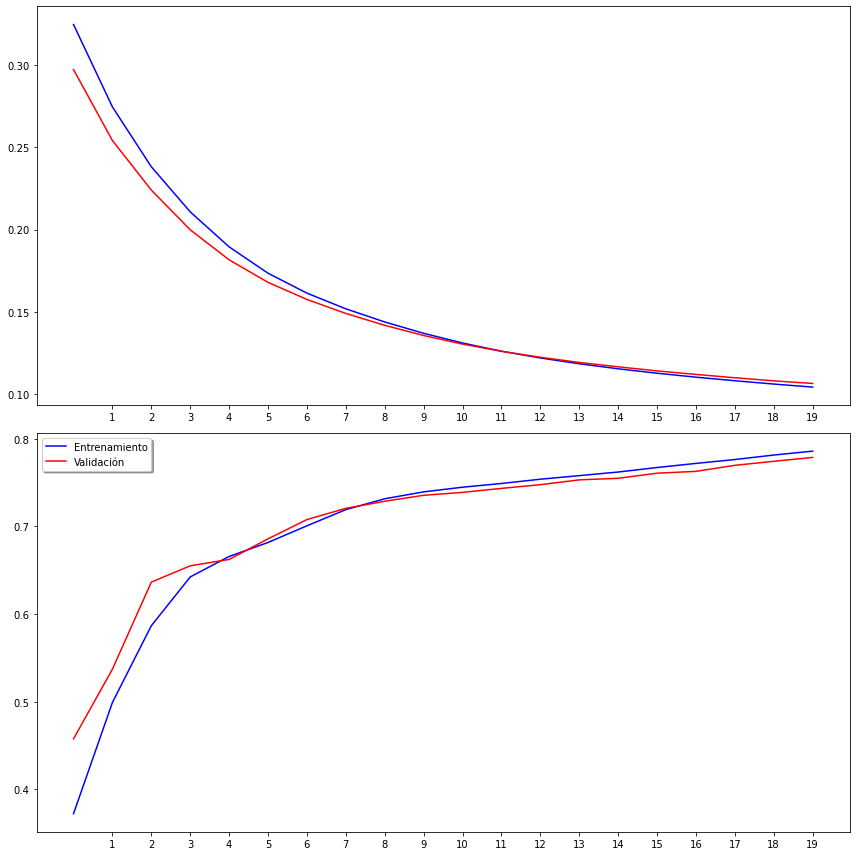

In [ ]:
from matplotlib import pyplot

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b')
ax1.plot(history.history['val_loss'], color='r')
ax1.set_xticks(np.arange(1, epochs, 1))

ax2.plot(history.history['accuracy'], color='b', label="Entrenamiento")
ax2.plot(history.history['val_accuracy'], color='r',label="Validación")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

**Respuesta:** Durante el entrenamiento se puede observar que tanto el accuracy como loss van mejorando progresivamente a medida que avanza cada repetición. A partir de estos valores, podemos decir que el modelo **no ha sufrido de overfitting** porque siempre hubo un avance en el accuracy y loss en cada epoca.

Otra características que observamos es que tanto los valores de entrenamiento y los valores de validación son muy cercanos en todo momento, esto quiere decir que **el modelo ha aprendido a generalizar muy bien** todos los patrones existentes en el caso.

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(1.0 puntos)***. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [ ]:
### Tu código aquí ###
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest loss: %.1f%%" % (100.0 * loss))
print("Test accuracy: %.1f%%" % (100.0 * acc))

157/157 [==============================] - 0s 702us/step - loss: 0.1066 - accuracy: 0.7788

Test loss: 10.7%
Test accuracy: 77.9%


**Respuesta:** Se ha conseguido un valor de **accuracy relativamente alto** con la parametrización indicada en el ejercicio, aunque podría ser mejor si cambia los parámetros de la red, como el número de capas, el número de nodos por cada capa, la función de activación etc. Además se destaca que el **porcentaje de error (loss) es bajo**.

**Pregunta 3.2 *(1.0 puntos)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

In [ ]:
model.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(x_test), axis=1))

array([[813,   7,  17,  88,   4,   5,  43,   0,  23,   0],
       [  4, 935,  15,  36,   6,   0,   2,   0,   2,   0],
       [ 22,   2, 680,  10, 190,   3,  76,   0,  17,   0],
       [ 53,  17,  10, 821,  34,   1,  58,   0,   6,   0],
       [  0,   4, 171,  41, 727,   1,  49,   0,   7,   0],
       [  0,   1,   0,   0,   0, 868,   0,  76,   9,  46],
       [243,   4, 238,  54, 205,   5, 208,   0,  43,   0],
       [  0,   0,   0,   0,   0,  56,   0, 863,   0,  81],
       [  0,   2,  13,  11,   2,   9,  19,   6, 937,   1],
       [  0,   0,   0,   0,   0,  16,   0,  47,   1, 936]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), np.argmax(model.predict(x_test), axis=1)))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1000
           1       0.96      0.94      0.95      1000
           2       0.59      0.68      0.63      1000
           3       0.77      0.82      0.80      1000
           4       0.62      0.73      0.67      1000
           5       0.90      0.87      0.88      1000
           6       0.46      0.21      0.29      1000
           7       0.87      0.86      0.87      1000
           8       0.90      0.94      0.92      1000
           9       0.88      0.94      0.91      1000

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.77      0.78      0.77     10000



**Respuesta:** En los de la matriz de confusión podemos observar que *la categoría 1 es el tipo de prenda de vestir que acierta más* (precisión **96%**), esto se debe a que el Pantalón (Trouser) tiene una forma particular no se parece mucho a otras prendas del dataset. Al contrario, las prendas de *la categoría 6* (precisión **46%**) que corresponde a la Camisa (Shirt) *las suele confundir con la categorías 0, 2, 3 y 4* que son Camiseta (T-Shirt), Jersey (Pullover), Vestido (Dress) y Abrigo (Coat) respectivamente, y que son muy parecidas entre ellas.